# The Sharpe Ratio

William F. Sharpe introduced the reward-to-variability ratio (Now called The Sharpe Ratio) which compares the return of an investment to its risk. The Sharpe Ratio's numerator is the difference over time between realized or expected gains and a benchmark (or risk free rate of return). The Sharpe Ratio divides a portfolios excess returns from the benchmark by a measure of its volatility to measure risk-adjusted preformance. A higher Sharpe Ratio means that the reward will be greater for a given unit of risk. 

In this project we will be calculating something similar to the Sharpe Ratio known as the Information Ratio. Instead of using a risk free return as a benchmark (such as U.S. Treasury Securities) I will be using the S&P 500 as a benchmark. I will be calculating the Information Ratios of Apple (AAPL) and Google (GOOGL) to see whether they outperform just putting money into the S&P 500, and if so which is the better of the two.



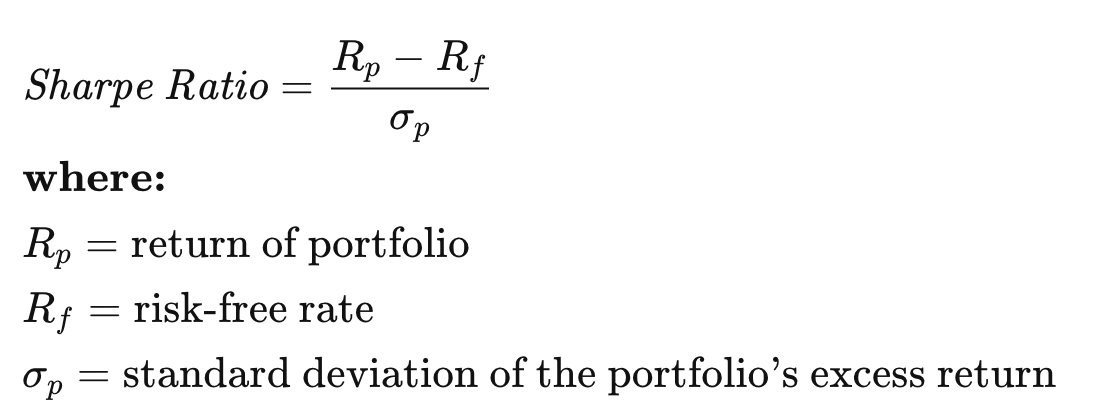

In [3]:
from IPython.display import Image
Image(filename="/Users/jonathanbeyene/Desktop/Screen Shot 2023-08-15 at 4.54.55 PM.png")

In [5]:
# Importing libraries
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

# reading in stock data into Data Frame
yf.pdr_override()
assets = ['GOOGL', 'AAPL', 'SPY']
start_date = datetime(2013, 1, 1)
end_date = datetime(2023, 8, 13)
df = pd.DataFrame()
# Getting Adjusted Close Price of Stocks
df = pdr.get_data_yahoo(assets, start = start_date, end = end_date)['Adj Close']
df.info()
df.head()

[*********************100%%**********************]  3 of 3 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2671 entries, 2013-01-02 to 2023-08-11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2671 non-null   float64
 1   GOOGL   2671 non-null   float64
 2   SPY     2671 non-null   float64
dtypes: float64(3)
memory usage: 83.5 KB


,AAPL,GOOGL,SPY
Date,,,
2013-01-02,16.791189,18.099348,120.399658
2013-01-03,16.579241,18.109859,120.127655
2013-01-04,16.117441,18.467718,120.655190
2013-01-07,16.022627,18.387136,120.325470
2013-01-08,16.065746,18.350851,119.979248


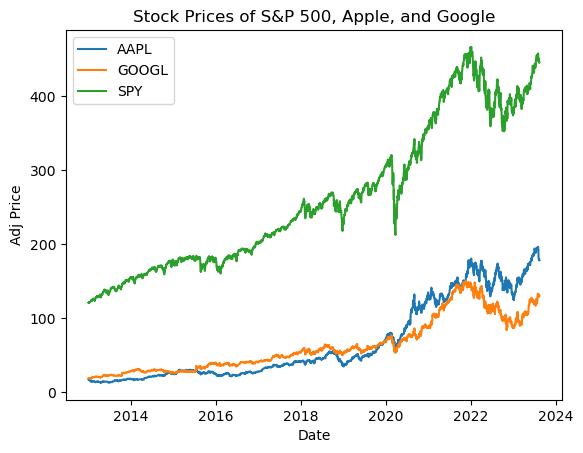

              AAPL        GOOGL          SPY
count  2671.000000  2671.000000  2671.000000
mean     66.428442    62.366457   262.236625
std      53.753960    35.699841    98.297486
min      12.013333    17.589338   119.979248
25%      25.035573    33.055000   179.028511
50%      41.178085    53.599998   244.206985
75%     120.327286    87.376251   353.383621
max     196.185074   149.838501   466.563324


In [6]:
# Plotting and summarizing stock data
for s in df.columns.values:
    plt.plot(df[s], label = s)

plt.title('Stock Prices of S&P 500, Apple, and Google')
plt.xlabel('Date')
plt.ylabel('Adj Price')
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

print(df.describe())

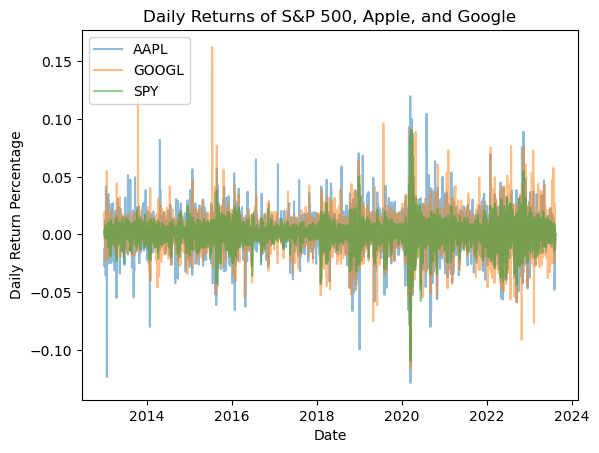

              AAPL        GOOGL          SPY
count  2670.000000  2670.000000  2670.000000
mean      0.001048     0.000886     0.000549
std       0.018063     0.017271     0.010820
min      -0.128647    -0.116341    -0.109424
25%      -0.007397    -0.007073    -0.003634
50%       0.000871     0.000788     0.000644
75%       0.010341     0.009208     0.005599
max       0.119808     0.162584     0.090603


In [7]:
# Our data gives us the historical value of the stock, but we need the percent change from one day to the next

# Finding daily returns
daily_returns = df.pct_change()
for r in df.columns.values:
    plt.plot(daily_returns[r], label = r, alpha = 0.5)

plt.title('Daily Returns of S&P 500, Apple, and Google')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage')
plt.legend(daily_returns.columns.values, loc = 'upper left')
plt.show()

print(daily_returns.describe())

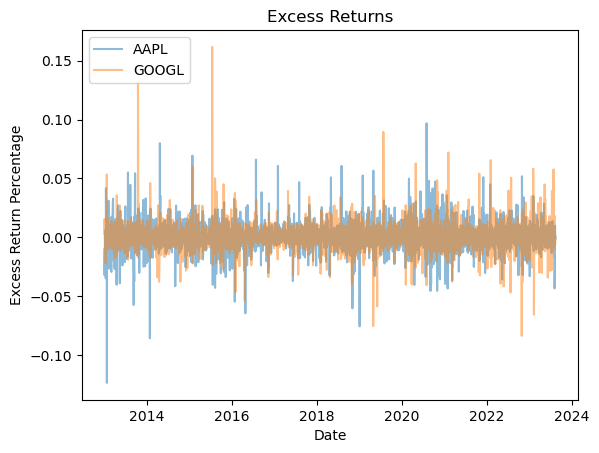

              AAPL        GOOGL
count  2670.000000  2670.000000
mean      0.000499     0.000337
std       0.012885     0.012065
min      -0.123825    -0.083871
25%      -0.005934    -0.005629
50%       0.000209    -0.000031
75%       0.006987     0.005775
max       0.096786     0.161736


In [8]:
# Now we need to compare the relative preformance of Apple & Google to the S&P 500 Benchmark

# Calculating Excess Returns
stock_returns = daily_returns[['AAPL', 'GOOGL']]
sp_returns = daily_returns['SPY']
excess_returns = stock_returns.sub(sp_returns, axis = 0)
for e in excess_returns.columns.values:
    plt.plot(excess_returns[e], label = e, alpha = 0.5)

plt.title('Excess Returns')
plt.xlabel('Date')
plt.ylabel('Excess Return Percentage')
plt.legend(excess_returns.columns.values, loc = 'upper left')
plt.show()

print(excess_returns.describe())

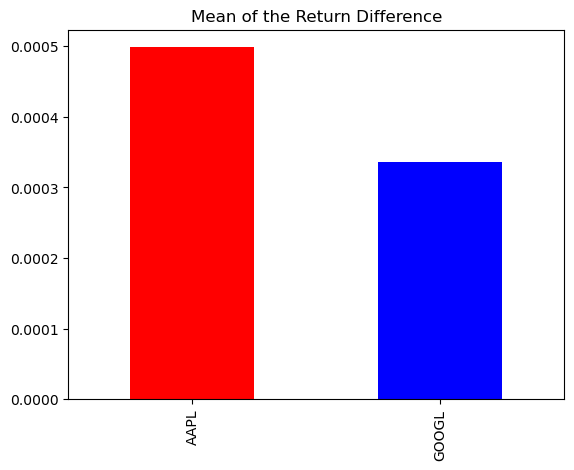

In [9]:
# Next I will calculate the average difference in daily returns to see on average how Apple & Google 
# compared to the S&P 500

# Finding and Plotting Mean of the return difference
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title = 'Mean of the Return Difference', color = ['red', 'blue'])
plt.show()
# The Chart below shows that both Apple and Google on average had higher daily return than the S&P 500, with
# Apple outpreforming Google

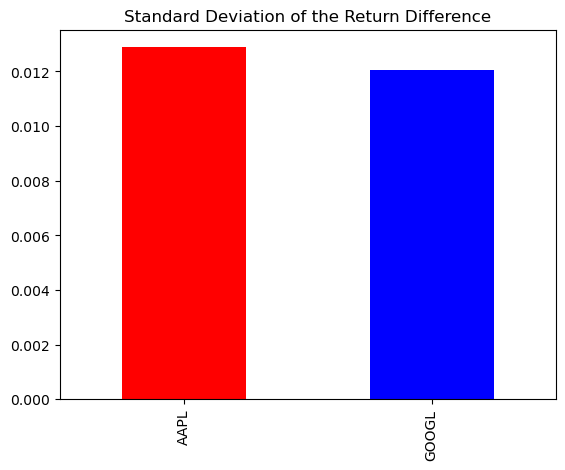

In [10]:
# Now I will calculate the standard deviation of the return difference which shows the amount of risk investing 
# in Apple & Google contains compared to investing in the S&P 500

# Finding and Plotting Standard Deviation of the Return Difference
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference', color = ['red', 'blue'])
plt.show()
# The chart below displays that the risk in investing in either Apple or Google is extremely similar

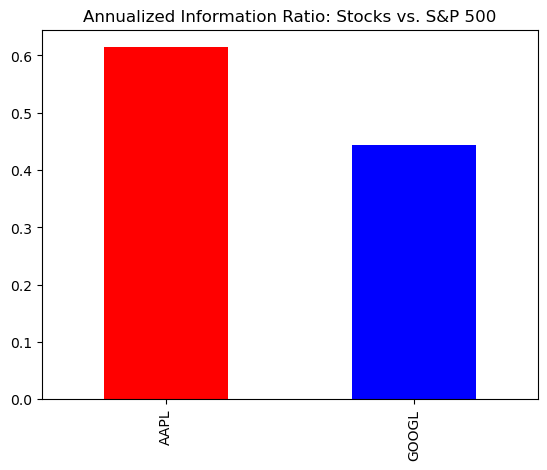

In [12]:
# Finally we will calculate the annualized Sharpe Ratio 

daily_information_ratio = avg_excess_return.div(std_excess_return)
annual_information_ratio = daily_information_ratio.mul(np.sqrt(252))
annual_information_ratio.plot.bar(title = 'Annualized Information Ratio: Stocks vs. S&P 500', color = ['red', 'blue'])
plt.show()
# In the chart below we see that Apple has a higher Information Ratio

Given the Information Ratios above it is evident that an investment in Apple will have higher returns per unit of risk. While investing in either Apple or Google would yield better returns than the S&P 500, between the two Apple is a better investment. The difference in information ratio is not caused by the volatility of either stock, and is instead due to Apple having higher daily average returns.  